In [2]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os

from scipy.stats import kurtosis, skew

from typing import List, Tuple

# Chunk the data into smaller segments

In [4]:
from mne.io import read_raw_eeglab

# Load raw data
input_fname = "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.set"
eog = ()

sample_data = read_raw_eeglab(
    input_fname=input_fname, eog=eog, preload=True, montage_units="mm", verbose=True
)


# Chunk data into 1 second epochs with 20% overlap
def chunk_data(raw: mne.io.Raw, epoch_length=1, overlap=0.2) -> List[mne.io.Raw]:
    total_recording_time = raw.times[-1]  # in seconds
    overlap_length = epoch_length * overlap
    start = 0
    epochs = []
    while start + epoch_length < total_recording_time:
        epochs.append(raw.copy().crop(tmin=start, tmax=start + epoch_length))
        start += epoch_length - overlap_length
    return epochs


epochs = chunk_data(sample_data, epoch_length=5, overlap=0)

# Check if the number of epochs is correct given 0% overlap
assert len(epochs) == sample_data.times[-1] // 5

Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.fdt
Reading 0 ... 50999  =      0.000 ...   101.998 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/3906682765.py:7: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  sample_data = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/3906682765.py:7: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  sample_data = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/3906682765.py:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  sample_data = read_raw_eeglab(


In [5]:
# calculate the mean of each channel over time
def calculate_mean(epochs: List[mne.io.Raw]) -> np.ndarray:
    means = []
    for epoch in epochs:
        try:
            means.append(epoch.get_data().mean(axis=1))
        except:
            print("Error")
            print(epoch.get_data().shape)
            break

    return np.array(means)


# calculate the Variance and Standard Deviation of each channel over time
def calculate_variance(epochs: List[mne.io.Raw]) -> np.ndarray:
    variances = []
    for epoch in epochs:
        variances.append(epoch.get_data().var(axis=1))
    return np.array(variances)


def calculate_std(epochs: List[mne.io.Raw]) -> np.ndarray:
    stds = []
    for epoch in epochs:
        stds.append(epoch.get_data().std(axis=1))
    return np.array(stds)


# calculate the Peak-to-Peak Amplitude of each channel over time
def calculate_peak_to_peak(epochs: List[mne.io.Raw]) -> np.ndarray:
    peak_to_peaks = []
    for epoch in epochs:
        peak_to_peaks.append(epoch.get_data().ptp(axis=1))
    return np.array(peak_to_peaks)


# calculate the Root Mean Square (RMS) of each channel over time
def calculate_rms(epochs: List[mne.io.Raw]) -> np.ndarray:
    rms = []
    for epoch in epochs:
        rms.append(np.sqrt(np.mean(epoch.get_data() ** 2, axis=1)))
    return np.array(rms)


# calculate the Skewness and Kurtosis of each channel over time
def calculate_skewness(epochs: List[mne.io.Raw]) -> np.ndarray:
    skewness_value = []
    for epoch in epochs:
        skewness_value.append(skew(epoch.get_data(), axis=1))
    return np.array(skewness_value)


def calculate_kurtosis(epochs: List[mne.io.Raw]) -> np.ndarray:
    kurtosis_value = []
    for epoch in epochs:
        kurtosis_value.append(kurtosis(epoch.get_data(), axis=1))
    return np.array(kurtosis_value)

In [6]:
input_fnames = {
    "pre": [
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_pre1_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_pre2_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_pre3_RELAX.set",
    ],
    "break": [
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_RELAX.set",
    ],
    "post": [
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_post2_RELAX.set",
        # "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_post3_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_post3_part2_RELAX.set",
    ],
}

In [7]:
input_fname = input_fnames["pre"][0]
pre_raws = read_raw_eeglab(
    input_fname=input_fname, eog=eog, preload=True, montage_units="mm", verbose=True
)
pre_epochs = chunk_data(pre_raws, epoch_length=5, overlap=0)

input_fname = input_fnames["post"][0]
post_raws = read_raw_eeglab(
    input_fname=input_fname, eog=eog, preload=True, montage_units="mm", verbose=True
)
post_epochs = chunk_data(post_raws, epoch_length=5, overlap=0)

Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_pre1_RELAX.fdt
Reading 0 ... 70749  =      0.000 ...   141.498 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/2517323738.py:2: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/2517323738.py:2: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/2517323738.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  pre_raws = read_raw_eeglab(


Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.fdt
Reading 0 ... 50999  =      0.000 ...   101.998 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/2517323738.py:8: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/2517323738.py:8: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/2517323738.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  post_raws = read_raw_eeglab(


In [8]:
def calculate_features(
    epochs: List[mne.io.Raw], is_channel_wise: bool = True
) -> pd.DataFrame:
    mean = calculate_mean(epochs)
    variance = calculate_variance(epochs)
    std = calculate_std(epochs)
    peak_to_peak = calculate_peak_to_peak(epochs)
    rms = calculate_rms(epochs)
    skewness = calculate_skewness(epochs)
    kurtosis = calculate_kurtosis(epochs)

    if is_channel_wise:
        axis = 0
    else:
        axis = 1

    return pd.DataFrame(
        {
            "mean": mean.mean(axis=axis),
            "variance": variance.mean(axis=axis),
            "std": std.mean(axis=axis),
            "peak_to_peak": peak_to_peak.mean(axis=axis),
            "rms": rms.mean(axis=axis),
            "skewness": skewness.mean(axis=axis),
            "kurtosis": kurtosis.mean(axis=axis),
        }
    )


pre_features = calculate_features(pre_epochs, is_channel_wise=False)  # 1 row per epoch

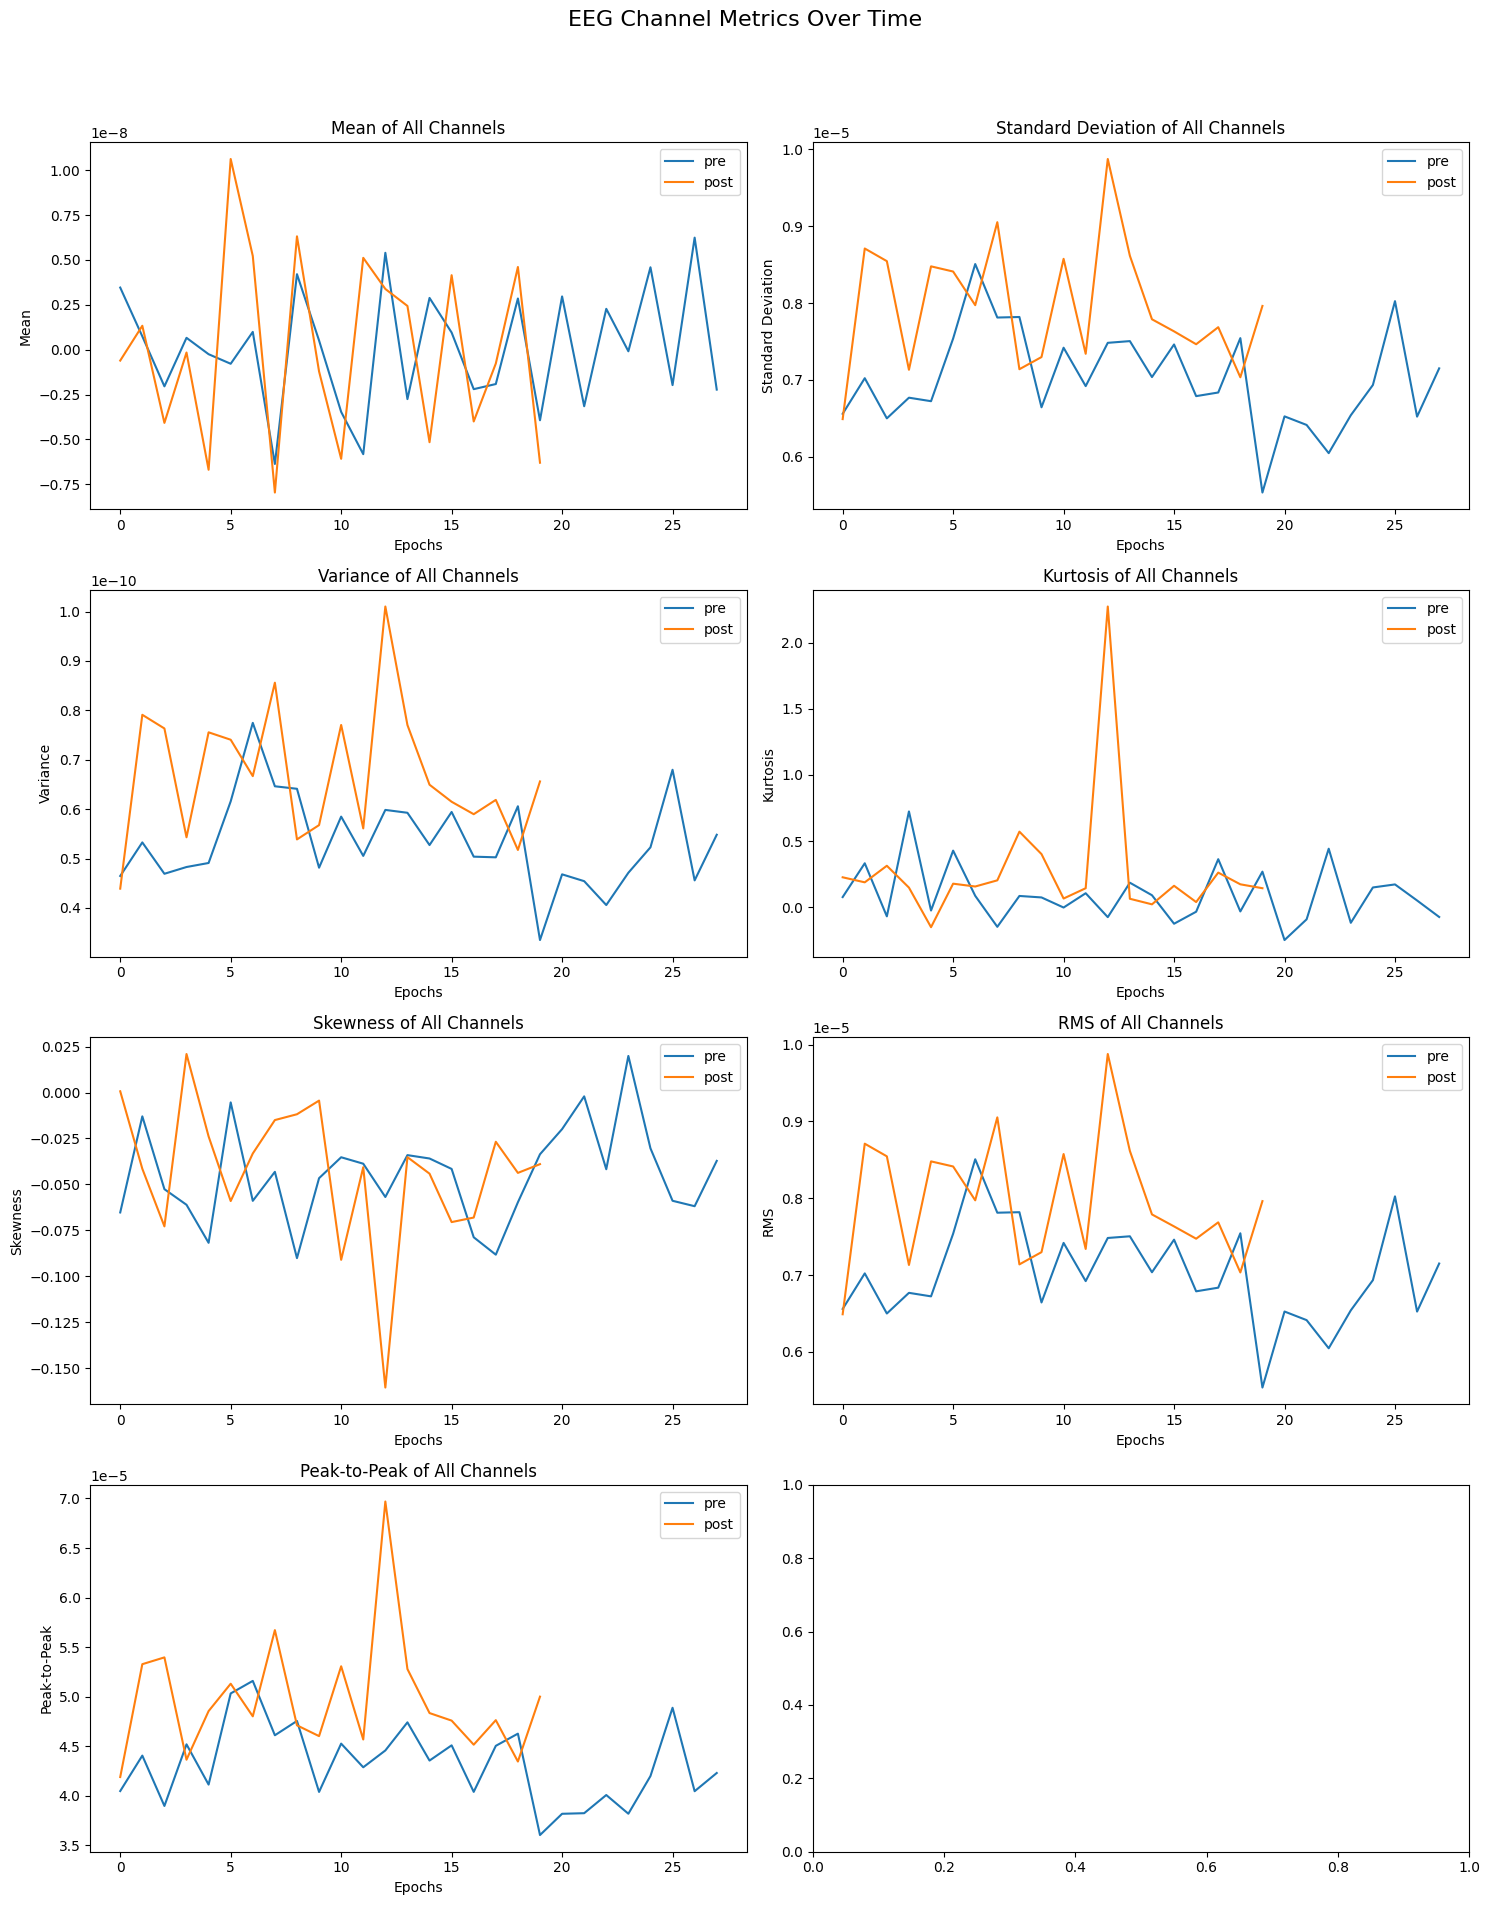

In [9]:
# Calculate all metrics first
pre_means = calculate_mean(pre_epochs)
post_means = calculate_mean(post_epochs)
pre_std = calculate_std(pre_epochs)
post_std = calculate_std(post_epochs)
pre_var = calculate_variance(pre_epochs)
post_var = calculate_variance(post_epochs)
pre_kurtosis = calculate_kurtosis(pre_epochs)
post_kurtosis = calculate_kurtosis(post_epochs)
pre_skewness = calculate_skewness(pre_epochs)
post_skewness = calculate_skewness(post_epochs)
pre_rms = calculate_rms(pre_epochs)
post_rms = calculate_rms(post_epochs)
pre_ptp = calculate_peak_to_peak(pre_epochs)
post_ptp = calculate_peak_to_peak(post_epochs)

# Setup the figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns
fig.suptitle("EEG Channel Metrics Over Time", fontsize=16)

# Plotting each metric
axs[0, 0].plot(pre_means.mean(axis=1), label="pre")
axs[0, 0].plot(post_means.mean(axis=1), label="post")
axs[0, 0].set_title("Mean of All Channels")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Mean")
axs[0, 0].legend()

axs[0, 1].plot(pre_std.mean(axis=1), label="pre")
axs[0, 1].plot(post_std.mean(axis=1), label="post")
axs[0, 1].set_title("Standard Deviation of All Channels")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Standard Deviation")
axs[0, 1].legend()

axs[1, 0].plot(pre_var.mean(axis=1), label="pre")
axs[1, 0].plot(post_var.mean(axis=1), label="post")
axs[1, 0].set_title("Variance of All Channels")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Variance")
axs[1, 0].legend()

axs[1, 1].plot(pre_kurtosis.mean(axis=1), label="pre")
axs[1, 1].plot(post_kurtosis.mean(axis=1), label="post")
axs[1, 1].set_title("Kurtosis of All Channels")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Kurtosis")
axs[1, 1].legend()

axs[2, 0].plot(pre_skewness.mean(axis=1), label="pre")
axs[2, 0].plot(post_skewness.mean(axis=1), label="post")
axs[2, 0].set_title("Skewness of All Channels")
axs[2, 0].set_xlabel("Epochs")
axs[2, 0].set_ylabel("Skewness")
axs[2, 0].legend()

axs[2, 1].plot(pre_rms.mean(axis=1), label="pre")
axs[2, 1].plot(post_rms.mean(axis=1), label="post")
axs[2, 1].set_title("RMS of All Channels")
axs[2, 1].set_xlabel("Epochs")
axs[2, 1].set_ylabel("RMS")
axs[2, 1].legend()

axs[3, 0].plot(pre_ptp.mean(axis=1), label="pre")
axs[3, 0].plot(post_ptp.mean(axis=1), label="post")
axs[3, 0].set_title("Peak-to-Peak of All Channels")
axs[3, 0].set_xlabel("Epochs")
axs[3, 0].set_ylabel("Peak-to-Peak")
axs[3, 0].legend()

# Adjust layout to not overlap subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()

In [10]:
epoch_length = 5
overlap = 0

pre_epochs = []
for input_fname in input_fnames["pre"]:
    pre_raws = read_raw_eeglab(
        input_fname=input_fname, eog=eog, preload=True, montage_units="mm", verbose=True
    )
    pre_epochs.extend(chunk_data(pre_raws, epoch_length=epoch_length, overlap=overlap))

post_epochs = []
for input_fname in input_fnames["post"]:
    post_raws = read_raw_eeglab(
        input_fname=input_fname, eog=eog, preload=True, montage_units="mm", verbose=True
    )
    post_epochs.extend(
        chunk_data(post_raws, epoch_length=epoch_length, overlap=overlap)
    )

len(pre_epochs), len(post_epochs)

Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_pre1_RELAX.fdt
Reading 0 ... 70749  =      0.000 ...   141.498 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  pre_raws = read_raw_eeglab(


Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_pre2_RELAX.fdt
Reading 0 ... 60499  =      0.000 ...   120.998 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  pre_raws = read_raw_eeglab(


Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_pre3_RELAX.fdt
Reading 0 ... 45999  =      0.000 ...    91.998 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  pre_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  pre_raws = read_raw_eeglab(


Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.fdt
Reading 0 ... 50999  =      0.000 ...   101.998 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  post_raws = read_raw_eeglab(


Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_post2_RELAX.fdt
Reading 0 ... 79249  =      0.000 ...   158.498 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  post_raws = read_raw_eeglab(


Reading /Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_post3_part2_RELAX.fdt
Reading 0 ... 46999  =      0.000 ...    93.998 secs...


/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  post_raws = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_55298/1786059345.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  post_raws = read_raw_eeglab(


(70, 69)

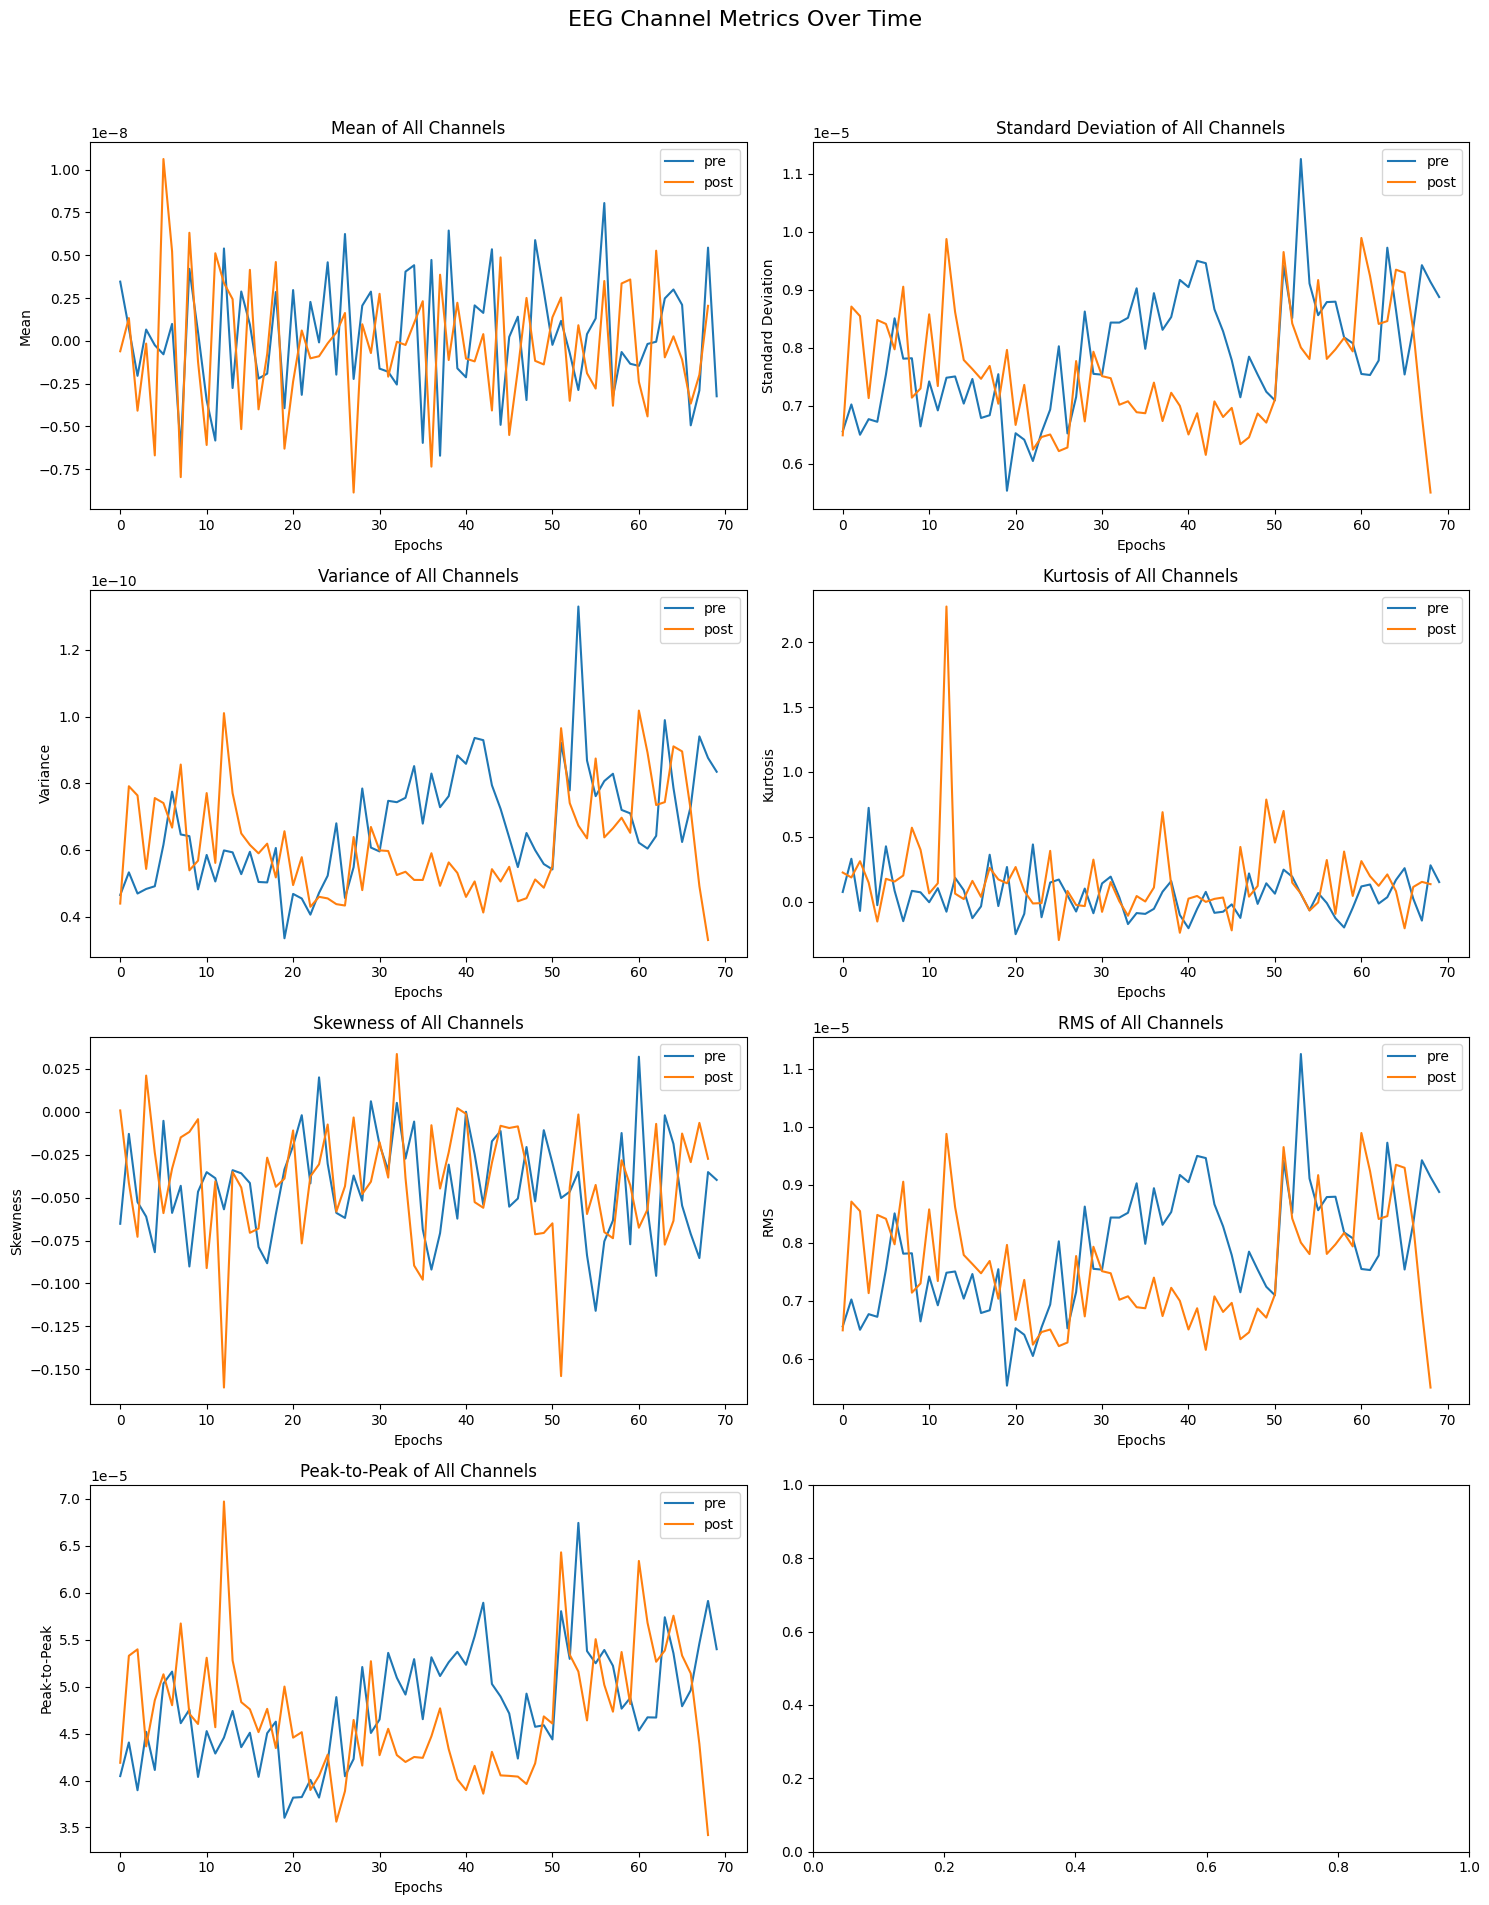

In [11]:
# Calculate all metrics first
pre_means = calculate_mean(pre_epochs)
post_means = calculate_mean(post_epochs)
pre_std = calculate_std(pre_epochs)
post_std = calculate_std(post_epochs)
pre_var = calculate_variance(pre_epochs)
post_var = calculate_variance(post_epochs)
pre_kurtosis = calculate_kurtosis(pre_epochs)
post_kurtosis = calculate_kurtosis(post_epochs)
pre_skewness = calculate_skewness(pre_epochs)
post_skewness = calculate_skewness(post_epochs)
pre_rms = calculate_rms(pre_epochs)
post_rms = calculate_rms(post_epochs)
pre_ptp = calculate_peak_to_peak(pre_epochs)
post_ptp = calculate_peak_to_peak(post_epochs)

# Setup the figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns
fig.suptitle("EEG Channel Metrics Over Time", fontsize=16)

# Plotting each metric
axs[0, 0].plot(pre_means.mean(axis=1), label="pre")
axs[0, 0].plot(post_means.mean(axis=1), label="post")
axs[0, 0].set_title("Mean of All Channels")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Mean")
axs[0, 0].legend()

axs[0, 1].plot(pre_std.mean(axis=1), label="pre")
axs[0, 1].plot(post_std.mean(axis=1), label="post")
axs[0, 1].set_title("Standard Deviation of All Channels")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Standard Deviation")
axs[0, 1].legend()

axs[1, 0].plot(pre_var.mean(axis=1), label="pre")
axs[1, 0].plot(post_var.mean(axis=1), label="post")
axs[1, 0].set_title("Variance of All Channels")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Variance")
axs[1, 0].legend()

axs[1, 1].plot(pre_kurtosis.mean(axis=1), label="pre")
axs[1, 1].plot(post_kurtosis.mean(axis=1), label="post")
axs[1, 1].set_title("Kurtosis of All Channels")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Kurtosis")
axs[1, 1].legend()

axs[2, 0].plot(pre_skewness.mean(axis=1), label="pre")
axs[2, 0].plot(post_skewness.mean(axis=1), label="post")
axs[2, 0].set_title("Skewness of All Channels")
axs[2, 0].set_xlabel("Epochs")
axs[2, 0].set_ylabel("Skewness")
axs[2, 0].legend()

axs[2, 1].plot(pre_rms.mean(axis=1), label="pre")
axs[2, 1].plot(post_rms.mean(axis=1), label="post")
axs[2, 1].set_title("RMS of All Channels")
axs[2, 1].set_xlabel("Epochs")
axs[2, 1].set_ylabel("RMS")
axs[2, 1].legend()

axs[3, 0].plot(pre_ptp.mean(axis=1), label="pre")
axs[3, 0].plot(post_ptp.mean(axis=1), label="post")
axs[3, 0].set_title("Peak-to-Peak of All Channels")
axs[3, 0].set_xlabel("Epochs")
axs[3, 0].set_ylabel("Peak-to-Peak")
axs[3, 0].legend()


# Adjust layout to not overlap subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Show plot
plt.show()